In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [28]:
df = pd.read_csv("eda_data.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,50,1,0,0,0,1,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,39,1,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,13,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,58,1,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,25,1,0,0,0,1,data scientist,na,2748,3


In [29]:
# Choose relevant columns
rel_cols = ["avg_salary", "Rating", "Size", "Type of ownership", "Industry", "Sector",
            "Revenue", "num_comp", "hourly", "employer_provided", "job_state", "same_state",
            "age", "python_yn", "spark_yn", "aws_yn", "excel_yn", "job_simp", "seniority",
            "desc_len"]
df_model = df[rel_cols]
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provided,job_state,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,50,1,0,0,1,data scientist,na,2555
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,39,1,0,0,0,data scientist,na,4828
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,13,1,1,0,1,data scientist,na,3495
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,58,1,0,0,0,data scientist,na,3926
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,25,1,0,0,1,data scientist,na,2748


In [30]:
# Get dummy data
df_dum = pd.get_dummies(df_model)
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark_yn,aws_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,50,1,0,0,...,False,False,True,False,False,False,False,False,True,False
1,87.5,3.4,0,0,0,0,39,1,0,0,...,False,False,True,False,False,False,False,False,True,False
2,85.0,4.8,0,0,0,1,13,1,1,0,...,False,False,True,False,False,False,False,False,True,False
3,76.5,3.8,3,0,0,1,58,1,0,0,...,False,False,True,False,False,False,False,False,True,False
4,114.5,2.9,3,0,0,1,25,1,0,0,...,False,False,True,False,False,False,False,False,True,False


In [31]:
from sklearn.model_selection import train_test_split

X = df_dum.drop("avg_salary", axis=1)
y = df_dum["avg_salary"].values

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
import statsmodels.api as sm

# Multiple linear regression
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm.astype(float))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           1.48e-94
Time:                        10:22:18   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6028      6.722      6.486      0.000      30.400      56.805
Rating                                                3.6047      1.937      1.860      0.063      -0.200       7.410
num_comp                                              2.2511      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5817      9.173     -3.988      0.000     -54.596     -18.567
employer_provided                                    31.3635     11.525      2.721      0.007       8.730      53.997
same_state                                            2.4811      2.618      0.948      0.344      -2.661       7.624
age                                                   0.0348      0.030      1.160      0.246      -0.024       0.094
python_yn                                             8.1363      2.523      3.224      0.001       3.180      13.092
spark_yn                                             -0.5712      2.921     -0.196      0.845      -6.307       5.165
aws_yn                                                1.1225      2.736      0.410      0.682      -4.250       6.495
excel_yn                                             -0.4020      2.268     -0.177      0.859      -4.856       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6193      8.629      1.578      0.115      -3.328      30.567
Size_1 to 50 employees                                1.1095      6.501      0.171      0.865     -11.658      13.877
Size_10000+ employees                                -2.9046      5.800     -0.501      0.617     -14.296       8.487
Size_1001 to 5000 employees                           6.1222      3.880      1.578      0.115      -1.498      13.743
Size_201 to 500 employees                             2.2414      3.873      0.579      0.563      -5.364       9.847
Size_5001 to 10000 employees                         -3.8770      5.443     -0.712      0.477     -14.567       6.813
Size_501 to 1000 employees                            2.1614      4.059      0.532      0.595      -5.811      10.134
Size_51 to 200 employees                              4.1813      4.422      0.946      0.345      -4.502      12.865
Size_Unknown                                         20.9495     13.993      1.497      0.135      -6.533      48.432
Type of ownership_-1                                 13.6193      8.629      1.578      0.115      -3.328      30.567
Type of ownership_College / University                6.4755     17.737      0.365      0.715     -28.359      41.310
Type of ownersh

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

cv_score = cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
print("cv_score:", cv_score)
print("mean cv_score:", np.mean(cv_score))

cv_score: [-2.18042631e+01 -1.42686578e+09 -3.13290704e+09]
mean cv_score: -1519924280.8730986


cv_score: [-21.53594904 -21.79968706 -20.81433389]
mean cv_score: -21.38332332896917


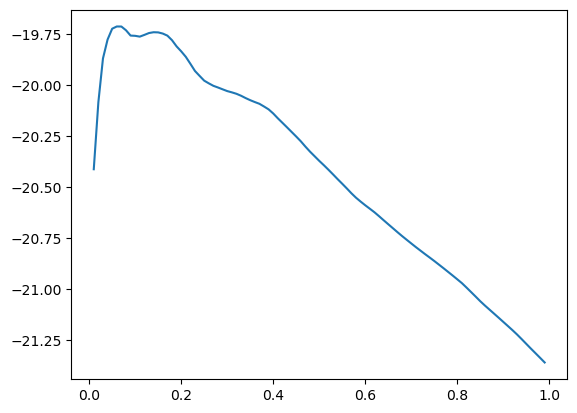

In [54]:
from sklearn.linear_model import Lasso

# Lasso regression
lm_l = Lasso()
lm_l.fit(X_train, y_train)
cv_score = cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
print("cv_score:", cv_score)
print("mean cv_score:", np.mean(cv_score))

alpha, error = [], []
for i in range(1, 100):
    alpha.append(i/100)
    lm_l = Lasso(alpha=(i/100))
    cv_score = cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
    error.append(np.mean(cv_score))

plt.plot(alpha, error)

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Random forest
rf = RandomForestRegressor()
cv_score = cross_val_score(rf, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)
np.mean(cv_score)

-16.38477272727273

In [46]:
from sklearn.model_selection import GridSearchCV

# Tune models GridsearchCV
parameters = {"n_estimators": range(10, 300, 10), "criterion": ("squared_error", "absolute_error"),
              "max_features": ("auto", "sqrt", "log2")}
gs = GridSearchCV(rf, parameters, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

c:\Users\Maximiliano\anaconda3\envs\DS_Salary\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
174 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maximiliano\anaconda3\envs\DS_Salary\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maximiliano\anaconda3\envs\DS_Salary\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Maximiliano\anaconda3\envs\DS_Salary\Lib\site-packages\sklearn\base.py", line 638, in _validate_params


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [48]:
print("Best score:", gs.best_score_)
print("Best estimator:", gs.best_estimator_)

Best score: -15.973327315997997
Best estimator: RandomForestRegressor(max_features='sqrt', n_estimators=180)


In [56]:
from sklearn.metrics import mean_absolute_error

# Test ensembles
tpred_lm = lm.fit(X_train, y_train).predict(X_test)
tpred_lml = lm_l.fit(X_train, y_train).predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

print("MAE Linear:", mean_absolute_error(y_test, tpred_lm))
print("MAE Lasso:", mean_absolute_error(y_test, tpred_lml))
print("MAE Random Forest:", mean_absolute_error(y_test, tpred_rf))

MAE Linear: 19.19299423073249
MAE Lasso: 21.959501062592924
MAE Random Forest: 13.05818216175359
